In [87]:
import pandas as pd
import os
import geopandas as gpd
import re

In [88]:
FILENAME1 = 'local_authority_districts.geojson'
FILENAME2 = 'all-domestic-certificates'

In [89]:
df_LA = gpd.read_file(FILENAME1)

df_LA.head()


,shape_area,lad21nm,long,objectid,lat,bng_n,shape_leng,lad21cd,bng_e,geometry
0,9.371703e+07,Hartlepool,-1.27018,1,54.676140,531474,70995.722933,E06000001,447160,"MULTIPOLYGON (((-1.22469 54.62610, -1.22491 54..."
1,2.450695e+08,Redcar and Cleveland,-1.00608,3,54.567520,519597,96704.031525,E06000003,464361,"MULTIPOLYGON (((-1.20097 54.57762, -1.20029 54..."
2,2.049330e+08,Stockton-on-Tees,-1.30664,4,54.556911,518183,123408.788096,E06000004,444940,"MULTIPOLYGON (((-1.27209 54.55336, -1.27211 54..."
3,1.974778e+08,Darlington,-1.56835,5,54.535339,515648,107203.152334,E06000005,428029,"POLYGON ((-1.63767 54.61713, -1.63766 54.61669..."
4,1.806280e+08,Warrington,-2.56167,7,53.391628,388456,114690.686846,E06000007,362744,"POLYGON ((-2.49407 53.48009, -2.49396 53.48004..."


Grabs LA code from each file name

In [90]:
path = "./all-domestic-certificates"
data = next(os.walk(path))[1]

cleared_data = list(data)

fn_df = pd.DataFrame(cleared_data, columns = ['Filename'])

new_df = fn_df['Filename'].str.split('-', expand = True)
fn_df['lad21cd'] = new_df[1].values

fn_df.reset_index(inplace = True, drop = True)


Grabs averge energy values from csvs

In [91]:
csvs = []
for root, dirs, files in os.walk(path):
    for name in files:
        csvs.append(os.path.join(root, name))

mean_df = pd.DataFrame(columns = ['Filename', 'efficiency'])
index = 0

for file in csvs:
    if re.match(".*certificates.*certificates.*csv$",file):
        effic = pd.read_csv(file, low_memory = False)
        filename = re.search("domestic-[E|W].*\/", file).group(0)
        filename = filename.rstrip(filename[-1])
        mean = effic['CURRENT_ENERGY_EFFICIENCY'].mean()
        mean_df.loc[index] = [filename, mean]
        index = index + 1



AttributeError: 'NoneType' object has no attribute 'group'

Add two dataframes together

In [83]:
total_df = mean_df.merge(fn_df)

total_df.head()

,Filename,efficiency,lad21cd
0,domestic-E07000133-Melton,60.819662,E07000133
1,domestic-E07000142-West-Lindsey,62.373837,E07000142
2,domestic-E08000019-Sheffield,63.683964,E08000019
3,domestic-E09000025-Newham,67.975458,E09000025


Merge with geodata

In [84]:
gdf = gpd.read_file(FILENAME1)
df_energy = total_df.merge(gdf)

Plot

<AxesSubplot:>

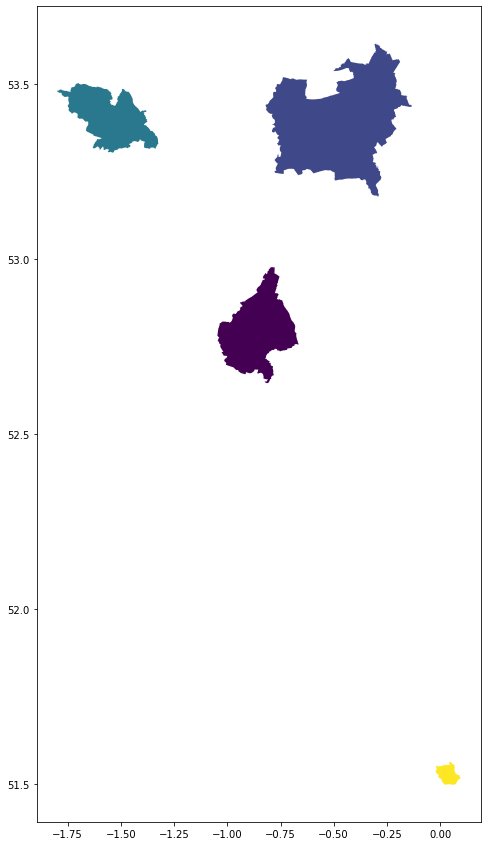

In [86]:
gdf = gpd.GeoDataFrame(
    df_energy, geometry= 'geometry')
gdf.plot('efficiency', figsize=(15,15))